In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
from numpy import average
import seaborn as sns

In [2]:
class CleanData():
    """ 'avg_decoded(ms)', 'avg_rgb(ms)', 'avg_filtered(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)',
                'total_slow_frames', 'total_callbacks', 'correct_play_time(sec)', 'actual_fps', 'total_video_frames',
                'default_fps', 'max_frame_time(ms)', 'correct_play_time(sec)'

                'decode(ms)','convert_rgb(ms)','filter(ms)','display(ms)','time_in_callback(ms)','avg_decoded(ms)',
    'avg_rgb(ms)','avg_filtered(ms)','avg_rendered(ms)','avg_total_time_to_display(ms)','total_slow_frames','total_callbacks',
    'real_play_time(sec)','actual_fps','total_video_frames','default_fps','max_frame_time(ms)','correct_play_time(sec)' """
    def __init__(self,name):
        self.name=self.convert_filename(name)
        self.final_stats_names = ['real_play_time(sec)','correct_play_time(sec)', 'actual_fps',
                'default_fps','total_slow_frames']
        self.avg_names = ['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_filtered(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)']
        self.summary_cols_names = self.avg_names+self.final_stats_names
        del_col_names = self.summary_cols_names +['total_video_frames',
                 'max_frame_time(ms)', 'correct_play_time(sec)','total_callbacks']
        self.df_summary=pd.DataFrame(columns=self.summary_cols_names)
        self.og_df = pd.read_csv(name, index_col=False)
        self.df = copy.copy(self.og_df)
        self.make_summary()
        self.df = self.df.drop(del_col_names, axis=1)


    def make_summary(self):
        cols_to_avg = ['decode(ms)', 'convert_rgb(ms)', 'filter(ms)', 'display(ms)', 'time_in_callback(ms)']

        for i, col_name in enumerate(cols_to_avg):
            avg_value = self.og_df[col_name].mean()
            self.df_summary.loc[0, self.summary_cols_names[i]] = avg_value

        for col_name in self.final_stats_names:
            self.df_summary[col_name] = self.og_df[col_name]

    def convert_filename(self,filename):
        basename = os.path.basename(filename)
        name_parts = basename.split('_')

        name_parts[0] = name_parts[0].replace('l_', 'linux_')
        name_parts[-1] = name_parts[-1].replace('.csv','')

        new_filename = '_'.join(name_parts)

        return new_filename




In [3]:
FILE_EXT = 'filterdNew/'
bm_O3_db_mmu = CleanData(FILE_EXT+'bm_greyscale_O3_nocache.csv')#/content/bm_O3_greyscale_nocache.csv
print(bm_O3_db_mmu.df.shape)

(360, 5)


In [4]:
bm_O3_db_mmu.df.head(9)

,decode(ms),convert_rgb(ms),filter(ms),display(ms),time_in_callback(ms)
0,1574.889,226.836,137.701,8.118,1947.544
1,522.543,226.768,142.191,8.113,899.615
2,439.914,227.007,142.152,8.104,817.177
3,559.263,226.901,143.578,8.083,937.825
4,535.603,226.823,143.674,8.084,914.184
5,596.872,227.140,143.779,8.105,975.896
6,1493.727,226.975,143.322,8.086,1872.110
7,581.413,226.922,139.195,8.107,955.637
8,528.269,227.081,142.102,8.085,905.537


In [5]:
bm_O3_db_mmu.df_summary.head(3)

,avg_decoded(ms),avg_rgb(ms),avg_filtered(ms),avg_rendered(ms),avg_total_time_to_display(ms),real_play_time(sec),correct_play_time(sec),actual_fps,default_fps,total_slow_frames
0,578.684917,230.291261,144.010994,8.246708,961.233881,344.06293,14.04,1.04632,25.0,360.0


In [6]:
files = [f for f in os.listdir(FILE_EXT) if f.endswith(".csv")]
print(files)

['l_greyscale_O1.csv', 'l_sobel_O3.csv', 'l_greyscale_O3.csv', 'l_greyscale_O2.csv', 'bm_greyscale_O1_allCache.csv', 'bm_sobelFSqrt_O3_allCache.csv', 'l_greyscale_O0.csv', 'bm_greyscale_O3_allCache.csv', 'l_sobel_O0.csv', 'bm_greyscale_O3_cached.csv', 'bm_sobel_O3_cached.csv', 'bm_sobel_O1_allCache.csv', 'l_sobel_O2.csv', 'l_sobel_O1.csv', 'bm_sobel_O3_allCache.csv', 'bm_sobel_O3_nocache.csv', 'bm_greyscale_O3_nocache.csv', 'bm_greyscale_O2_allCache.csv', 'bm_sobel_O2_allCache.csv']


In [7]:
dfs = []
for file in files:
    dfs.append(CleanData(FILE_EXT+file))
dfs.sort(key=lambda x: x.name)
for d in dfs:
    print(d.name)

bm_greyscale_O1_allCache
bm_greyscale_O2_allCache
bm_greyscale_O3_allCache
bm_greyscale_O3_cached
bm_greyscale_O3_nocache
bm_sobelFSqrt_O3_allCache
bm_sobel_O1_allCache
bm_sobel_O2_allCache
bm_sobel_O3_allCache
bm_sobel_O3_cached
bm_sobel_O3_nocache
l_greyscale_O0
l_greyscale_O1
l_greyscale_O2
l_greyscale_O3
l_sobel_O0
l_sobel_O1
l_sobel_O2
l_sobel_O3


In [8]:
avg_df = pd.DataFrame()
i=0
for df in dfs:

    df.df_summary['file'] = df.name
    df.og_df['file'] = df.name
    df.df['file'] = df.name
    avg_df = pd.concat([avg_df,df.df_summary[['file']+df.avg_names]], axis=0, ignore_index=True)

avg_df.head(5)

,file,avg_decoded(ms),avg_rgb(ms),avg_filtered(ms),avg_rendered(ms),avg_total_time_to_display(ms)
0,bm_greyscale_O1_allCache,170.011213,8.307094,3.156094,2.522932,183.997332
1,bm_greyscale_O2_allCache,37.919043,7.391929,3.74023,2.577017,51.628219
2,bm_greyscale_O3_allCache,33.552006,7.391307,3.140352,1.54629,45.629955
3,bm_greyscale_O3_cached,161.393784,89.894071,30.488165,4.634688,286.410707
4,bm_greyscale_O3_nocache,578.684917,230.291261,144.010994,8.246708,961.233881


In [9]:
avg_df =avg_df.set_index('file')
avg_df = avg_df.sort_index()

In [10]:
avg_df.head(10)

,avg_decoded(ms),avg_rgb(ms),avg_filtered(ms),avg_rendered(ms),avg_total_time_to_display(ms)
file,,,,,
bm_greyscale_O1_allCache,170.011213,8.307094,3.156094,2.522932,183.997332
bm_greyscale_O2_allCache,37.919043,7.391929,3.74023,2.577017,51.628219
bm_greyscale_O3_allCache,33.552006,7.391307,3.140352,1.54629,45.629955
bm_greyscale_O3_cached,161.393784,89.894071,30.488165,4.634688,286.410707
bm_greyscale_O3_nocache,578.684917,230.291261,144.010994,8.246708,961.233881
bm_sobelFSqrt_O3_allCache,33.618773,7.391852,16.163031,1.280634,58.45429
bm_sobel_O1_allCache,180.459733,8.304943,1519.814804,2.509898,1711.089378
bm_sobel_O2_allCache,44.183813,7.393776,1038.729469,2.55942,1092.866477
bm_sobel_O3_allCache,34.633483,7.391469,193.828727,1.515597,237.369276


In [11]:
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
df_l = avg_df[avg_df.index.str.startswith('l')]
df_bm = avg_df[avg_df.index.str.startswith('bm')]
df_l.head(5)

,avg_decoded(ms),avg_rgb(ms),avg_filtered(ms),avg_rendered(ms),avg_total_time_to_display(ms)
file,,,,,
l_greyscale_O0,52.532619,26.528453,15.556988,2.947813,97.56588
l_greyscale_O1,19.018328,8.374356,4.87893,3.274252,35.545866
l_greyscale_O2,14.960127,6.820162,4.380338,2.934507,29.095134
l_greyscale_O3,12.097753,6.84599,4.399416,2.883144,26.226302
l_sobel_O0,52.572856,26.451493,173.586645,4.886116,257.497094


#linux version overview:
 - the gap between o0 and o1 is by far the most significant
 - ffastmath diffrence is small but present especially for sobel
 - the sobel filter benifits the most from optimization
 - sobel is quite slow
 -

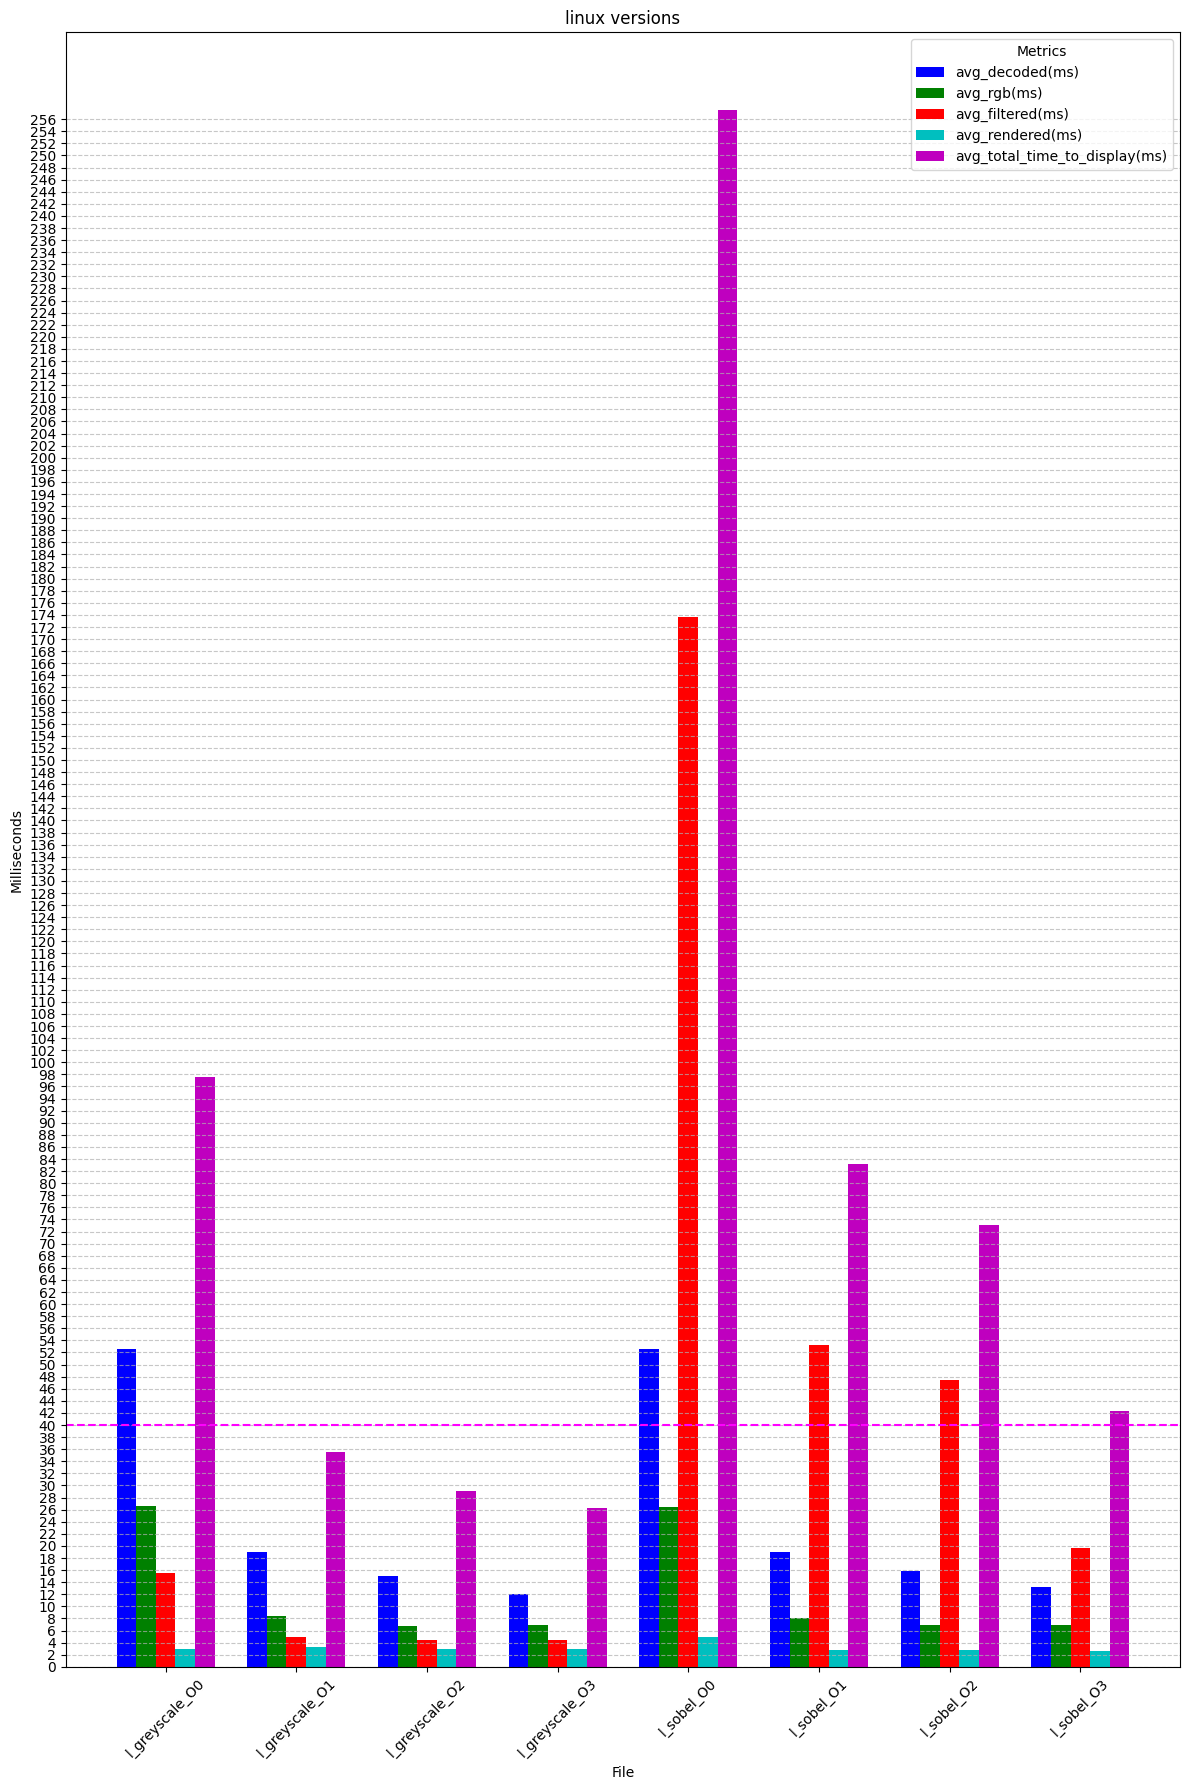

In [12]:
bar_width = 0.15
x = np.arange(len(df_l.index))
plt.figure(figsize=(12,18))
for i, col in enumerate(df_l.columns):
    plt.bar(x + i * bar_width, df_l[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_l.columns) - 1) * bar_width / 2, df_l.index, rotation=45)
plt.yticks(np.arange(0, df_l.max().max(), step=2))
plt.title('linux versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.tight_layout()

plt.show()


In [13]:
df_bm.head(4)

,avg_decoded(ms),avg_rgb(ms),avg_filtered(ms),avg_rendered(ms),avg_total_time_to_display(ms)
file,,,,,
bm_greyscale_O1_allCache,170.011213,8.307094,3.156094,2.522932,183.997332
bm_greyscale_O2_allCache,37.919043,7.391929,3.74023,2.577017,51.628219
bm_greyscale_O3_allCache,33.552006,7.391307,3.140352,1.54629,45.629955
bm_greyscale_O3_cached,161.393784,89.894071,30.488165,4.634688,286.410707


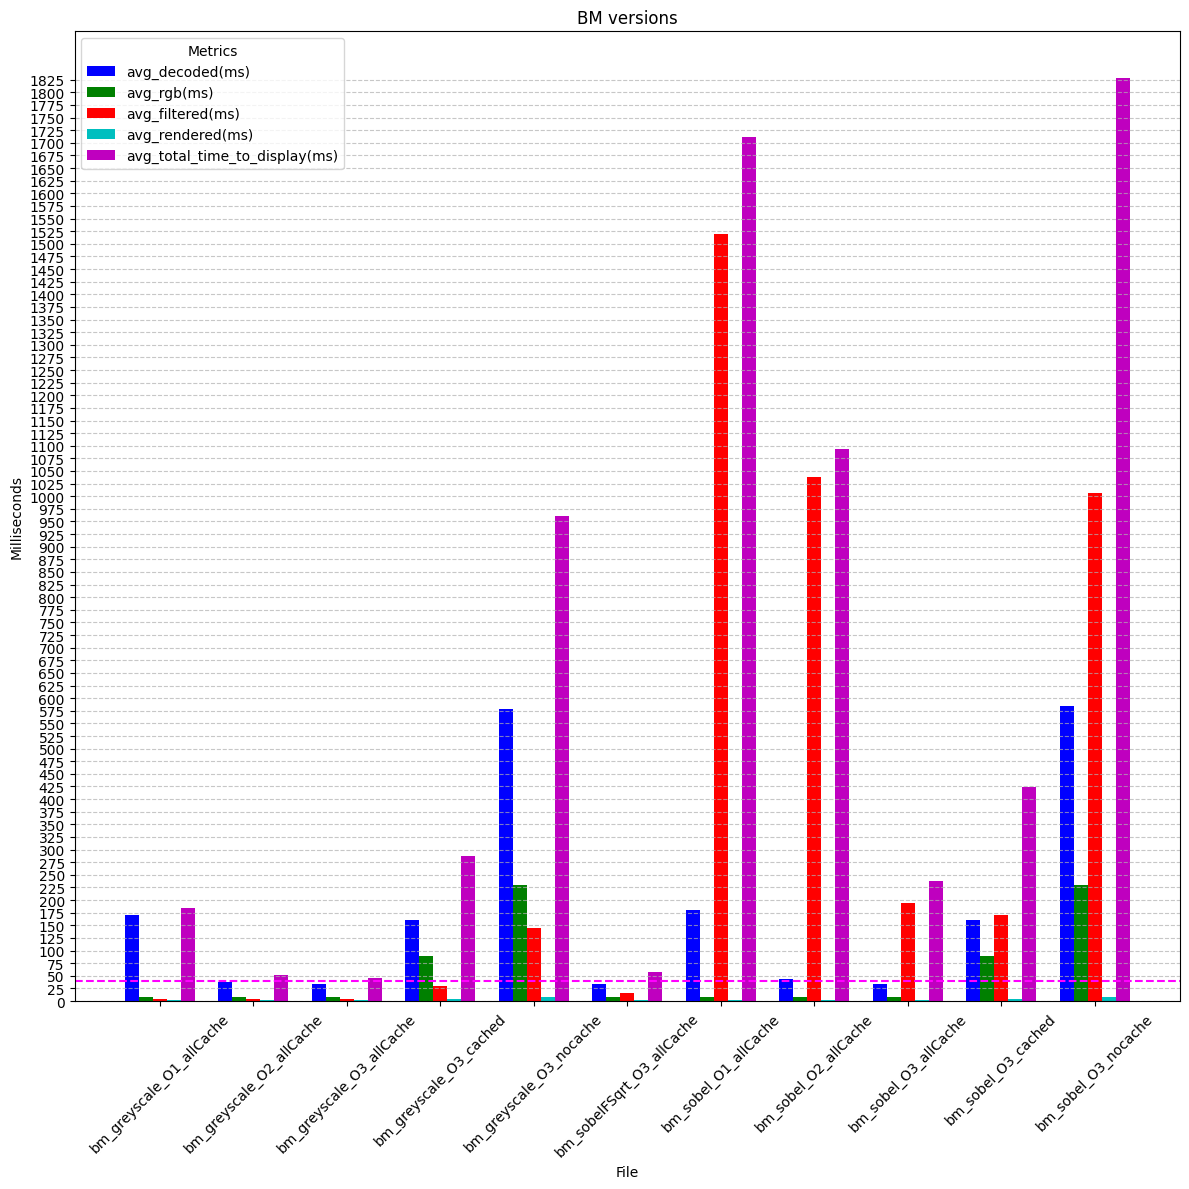

In [14]:
x = np.arange(len(df_bm.index))
plt.figure(figsize=(12, 12))
for i, col in enumerate(df_bm.columns):
    plt.bar(x + i * bar_width, df_bm[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_bm.columns) - 1) * bar_width / 2, df_bm.index, rotation=45)
plt.yticks(np.arange(0, df_bm.max().max(), step=25))
plt.title('BM versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.tight_layout()

plt.show()

In [15]:
print("sobel caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")

print("greysacale caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")

print("sobel allocating caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")

print("greysacale allocating caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")


sobel caching improvement from nocache
decode speed up with cache: 3.653729684801363x
rgb conversion speed up with cache: 2.5961481125648027x
filter speed up with cache: 5.931853437023905x
render speed up with cache: 1.7591306787128975x
overall speed up with cache: 4.323055135746774x

greysacale caching improvement from nocache
decode speed up with cache: 3.5855464937900448x
rgb conversion speed up with cache: 2.5618070078602653x
filter speed up with cache: 4.7235048589499655x
render speed up with cache: 1.779345065515924x
overall speed up with cache: 3.356138076426263x

sobel allocating caching improvement from nocache
decode speed up with cache: 16.88730264585107x
rgb conversion speed up with cache: 31.224268969997784x
filter speed up with cache: 5.187636214446118x
render speed up with cache: 5.454139346566946x
overall speed up with cache: 7.707141171862318x

greysacale allocating caching improvement from nocache
decode speed up with cache: 17.247401605569465x
rgb conversion speed up

In [16]:
df_sum = pd.DataFrame()
#['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)','correct_play_time(sec)', 'actual_fps','total_slow_frames']
for df in dfs:
    df_summary_copy = df.df_summary.copy()
    df_summary_copy['file'] = df.name
    df_sum = pd.concat([df_sum, df_summary_copy[['file', 'real_play_time(sec)', 'actual_fps', 'total_slow_frames']]],
                       ignore_index=True)

df_sum =df_sum.set_index('file')

df_sum = df_sum.sort_index()
df_sum.head(6)

,real_play_time(sec),actual_fps,total_slow_frames
file,,,
bm_greyscale_O1_allCache,64.326556,5.472079,351.0
bm_greyscale_O2_allCache,18.066820,19.483229,347.0
bm_greyscale_O3_allCache,15.978590,22.029478,290.0
bm_greyscale_O3_cached,100.140329,3.515067,352.0
bm_greyscale_O3_nocache,344.062930,1.046320,360.0
bm_sobelFSqrt_O3_allCache,20.467509,17.197989,351.0


In [17]:
best_bm_worst_l_greyscale_df = pd.concat([
    avg_df[avg_df.index == 'bm_greyscale_O3_allCache'],
    avg_df[avg_df.index == 'l_greyscale_O0']
])

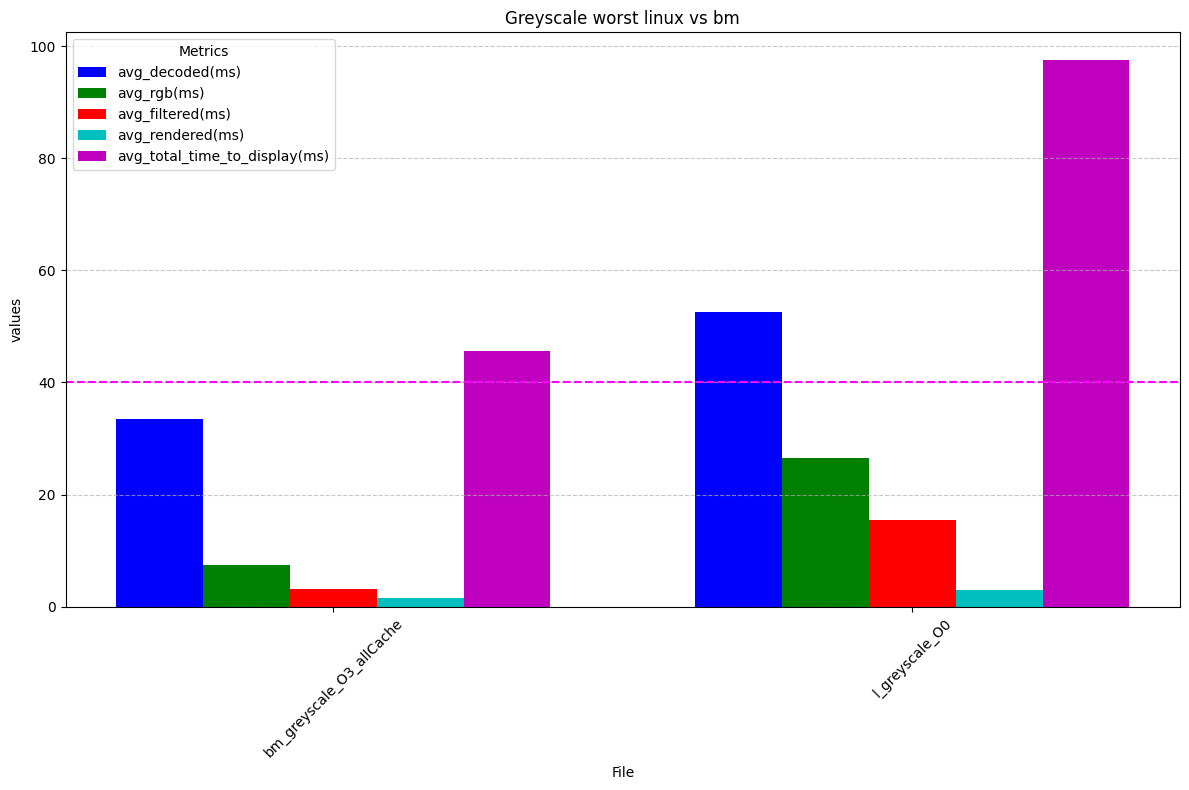

In [18]:
x = np.arange(len(best_bm_worst_l_greyscale_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_greyscale_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_greyscale_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_greyscale_df.columns) - 1) * bar_width / 2, best_bm_worst_l_greyscale_df.index, rotation=45)
plt.title('Greyscale worst linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.tight_layout()

plt.show()

In [19]:
best_bm_worst_l_sobel_df = pd.concat([
    avg_df[avg_df.index == 'bm_sobelFSqrt_O3_allCache'],
    avg_df[avg_df.index == 'l_sobel_O0']
])

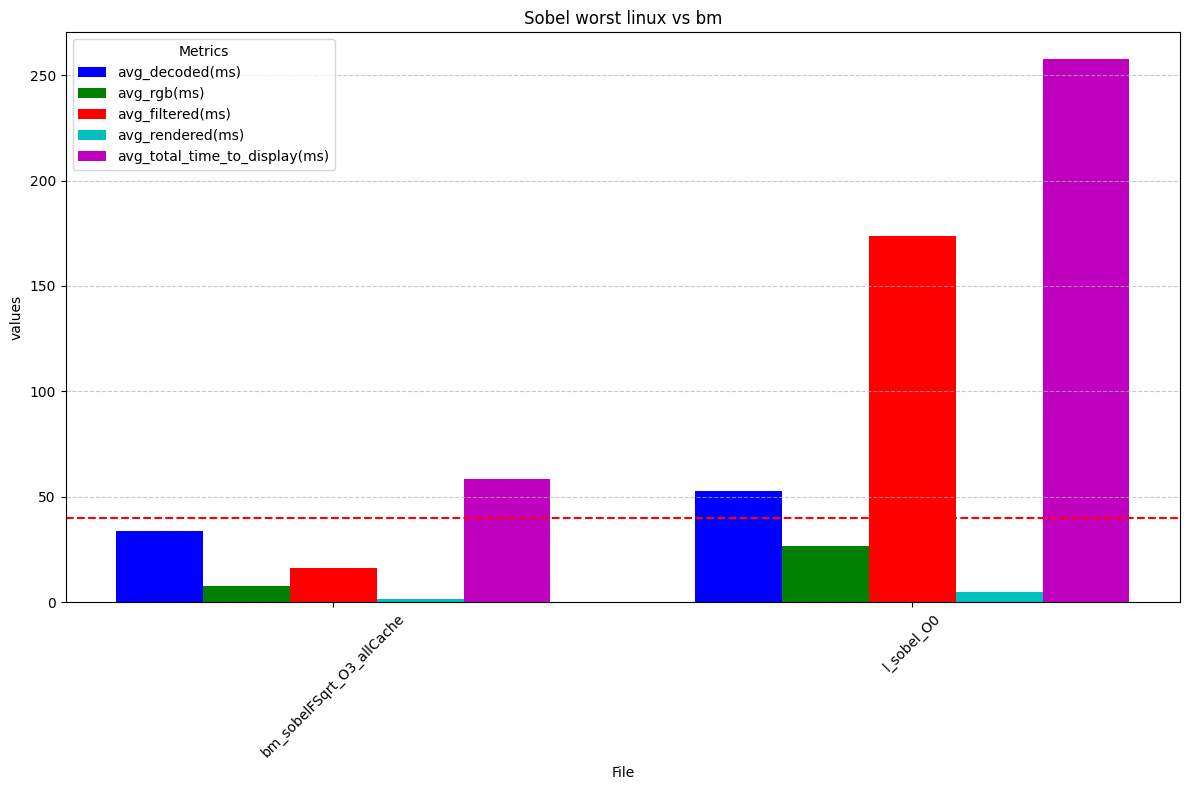

In [20]:
x = np.arange(len(best_bm_worst_l_sobel_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_sobel_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_sobel_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_sobel_df.columns) - 1) * bar_width / 2, best_bm_worst_l_sobel_df.index, rotation=45)
plt.title('Sobel worst linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='red', linestyle='--', label='25fps')
plt.tight_layout()

plt.show()

The video should be playing for 14.04 seconds at 25 frames per second.
these is always some amount of slow frames but on bm they are all slow and slow here being more the 40 ms needed to be the average in order to hit the desired framerate

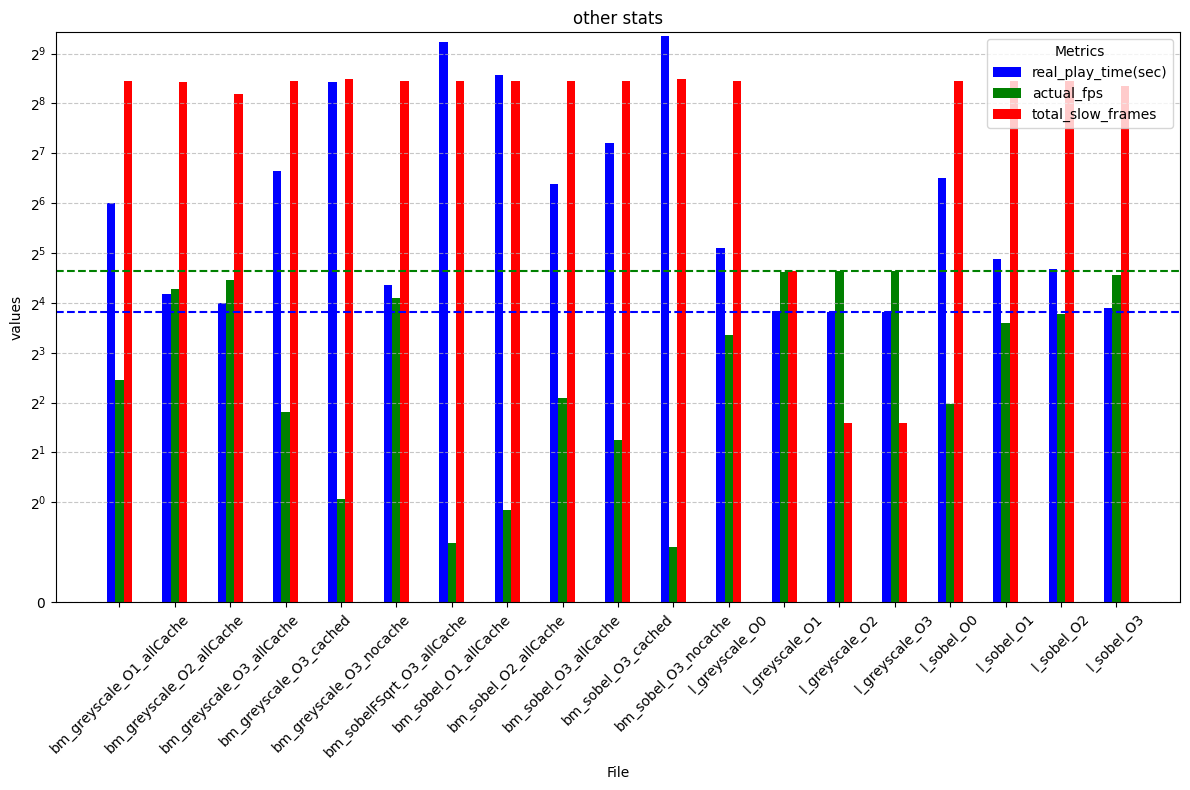

In [21]:
x = np.arange(len(df_sum.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_sum.columns):
    plt.bar(x + i * bar_width, df_sum[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_sum.columns) - 1) * bar_width / 2, df_sum.index, rotation=45)
plt.yscale('symlog', base=2, linthresh=1)
plt.title('other stats')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=25, color='green', linestyle='--', label='25fps')
plt.axhline(y=14, color='blue', linestyle='--', label='14sec')
plt.tight_layout()

plt.show()

In [22]:
def count_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

- bm has fewer outliers in sobel dislplay, sobel  convert RGB (greyscale has significantly more), and filter

l_greyscale_O0, decode(ms): 6
l_greyscale_O1, decode(ms): 8
l_greyscale_O2, decode(ms): 6
l_greyscale_O3, decode(ms): 6
l_sobel_O0, decode(ms): 6
l_sobel_O1, decode(ms): 8
l_sobel_O2, decode(ms): 7
l_sobel_O3, decode(ms): 7
bm_greyscale_O1_allCache, decode(ms): 7
bm_greyscale_O2_allCache, decode(ms): 10
bm_greyscale_O3_allCache, decode(ms): 21
bm_greyscale_O3_cached, decode(ms): 5
bm_greyscale_O3_nocache, decode(ms): 16
bm_sobelFSqrt_O3_allCache, decode(ms): 21


/tmp/ipykernel_165517/1433460260.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_165517/1433460260.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


bm_sobel_O1_allCache, decode(ms): 7
bm_sobel_O2_allCache, decode(ms): 11
bm_sobel_O3_allCache, decode(ms): 21
bm_sobel_O3_cached, decode(ms): 5
bm_sobel_O3_nocache, decode(ms): 17
l_greyscale_O0, convert_rgb(ms): 26
l_greyscale_O1, convert_rgb(ms): 17
l_greyscale_O2, convert_rgb(ms): 9
l_greyscale_O3, convert_rgb(ms): 11
l_sobel_O0, convert_rgb(ms): 29
l_sobel_O1, convert_rgb(ms): 15
l_sobel_O2, convert_rgb(ms): 6
l_sobel_O3, convert_rgb(ms): 22
bm_greyscale_O1_allCache, convert_rgb(ms): 3


/tmp/ipykernel_165517/1433460260.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_165517/1433460260.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


bm_greyscale_O2_allCache, convert_rgb(ms): 0
bm_greyscale_O3_allCache, convert_rgb(ms): 11
bm_greyscale_O3_cached, convert_rgb(ms): 166
bm_greyscale_O3_nocache, convert_rgb(ms): 56
bm_sobelFSqrt_O3_allCache, convert_rgb(ms): 8
bm_sobel_O1_allCache, convert_rgb(ms): 1
bm_sobel_O2_allCache, convert_rgb(ms): 6
bm_sobel_O3_allCache, convert_rgb(ms): 10
bm_sobel_O3_cached, convert_rgb(ms): 1
bm_sobel_O3_nocache, convert_rgb(ms): 11
l_greyscale_O0, filter(ms): 0
l_greyscale_O1, filter(ms): 68
l_greyscale_O2, filter(ms): 35
l_greyscale_O3, filter(ms): 37
l_sobel_O0, filter(ms): 21
l_sobel_O1, filter(ms): 15
l_sobel_O2, filter(ms): 14
l_sobel_O3, filter(ms): 21
bm_greyscale_O1_allCache, filter(ms): 84
bm_greyscale_O2_allCache, filter(ms): 6
bm_greyscale_O3_allCache, filter(ms): 7
bm_greyscale_O3_cached, filter(ms): 0
bm_greyscale_O3_nocache, filter(ms): 0
bm_sobelFSqrt_O3_allCache, filter(ms): 14
bm_sobel_O1_allCache, filter(ms): 37
bm_sobel_O2_allCache, filter(ms): 1
bm_sobel_O3_allCache, fil

/tmp/ipykernel_165517/1433460260.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_165517/1433460260.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


bm_sobel_O3_nocache, filter(ms): 10
l_greyscale_O0, display(ms): 19
l_greyscale_O1, display(ms): 61
l_greyscale_O2, display(ms): 40
l_greyscale_O3, display(ms): 21
l_sobel_O0, display(ms): 18
l_sobel_O1, display(ms): 14
l_sobel_O2, display(ms): 17
l_sobel_O3, display(ms): 30


/tmp/ipykernel_165517/1433460260.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_165517/1433460260.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


bm_greyscale_O1_allCache, display(ms): 0
bm_greyscale_O2_allCache, display(ms): 16
bm_greyscale_O3_allCache, display(ms): 18
bm_greyscale_O3_cached, display(ms): 30
bm_greyscale_O3_nocache, display(ms): 62
bm_sobelFSqrt_O3_allCache, display(ms): 8
bm_sobel_O1_allCache, display(ms): 1
bm_sobel_O2_allCache, display(ms): 11
bm_sobel_O3_allCache, display(ms): 14
bm_sobel_O3_cached, display(ms): 1
bm_sobel_O3_nocache, display(ms): 17
l_greyscale_O0, time_in_callback(ms): 7
l_greyscale_O1, time_in_callback(ms): 11
l_greyscale_O2, time_in_callback(ms): 9
l_greyscale_O3, time_in_callback(ms): 11
l_sobel_O0, time_in_callback(ms): 6
l_sobel_O1, time_in_callback(ms): 8
l_sobel_O2, time_in_callback(ms): 8
l_sobel_O3, time_in_callback(ms): 9
bm_greyscale_O1_allCache, time_in_callback(ms): 7
bm_greyscale_O2_allCache, time_in_callback(ms): 10
bm_greyscale_O3_allCache, time_in_callback(ms): 21
bm_greyscale_O3_cached, time_in_callback(ms): 10
bm_greyscale_O3_nocache, time_in_callback(ms): 16
bm_sobelFS

/tmp/ipykernel_165517/1433460260.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')
/tmp/ipykernel_165517/1433460260.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


bm_sobel_O3_cached, time_in_callback(ms): 6
bm_sobel_O3_nocache, time_in_callback(ms): 16


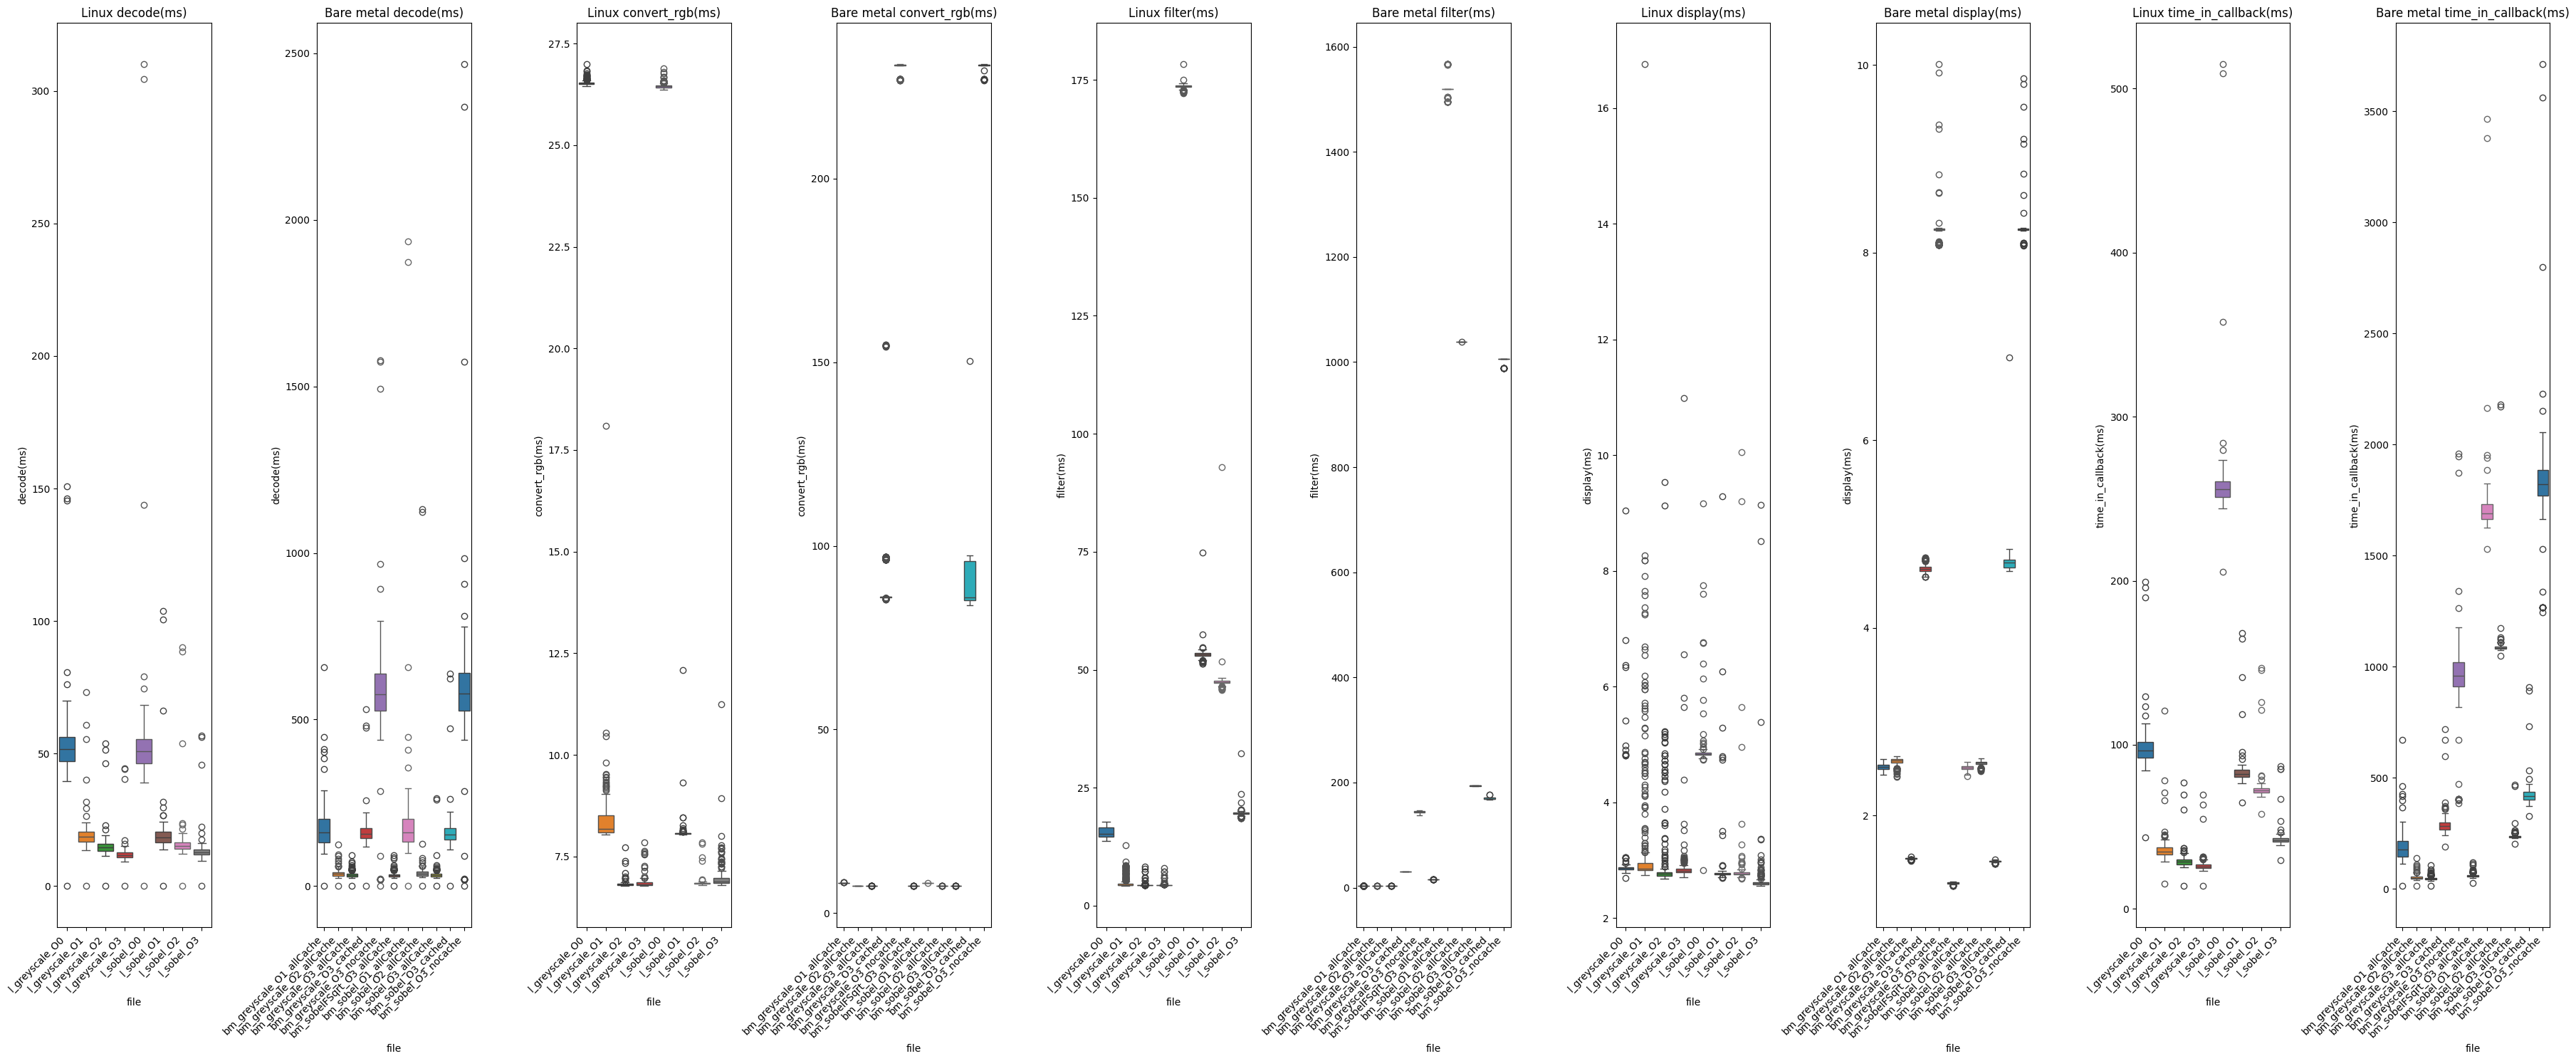

In [23]:
num_cols = len(dfs[0].df.columns) - 1
fig, axes = plt.subplots(1, num_cols*2, figsize=(36, 15))

# Create two lists to store the 'l_' and 'bm_' dataframes separately
l_dfs = [df_obj for df_obj in dfs if df_obj.name.startswith('l_')]
bm_dfs = [df_obj for df_obj in dfs if df_obj.name.startswith('bm_')]
x = 0
for i, column in enumerate(dfs[0].df.columns ):
    if column != 'file':
        ax = axes[x]

        # Plot the 'l_' dataframes
        for df_obj in l_dfs:
            sns.boxplot(x='file', y=column, data=df_obj.df, ax=ax)        # Set x-axis labels for both 'l_' and 'bm_' plots
            print(f"{df_obj.name}, {column}: {count_outliers(df_obj.df[column])}")
        x_labels = [df_obj.name for df_obj in l_dfs] + [df_obj.name for df_obj in bm_dfs]
        ax.set_xticklabels(x_labels, rotation=45, ha='right')

        ax.set_title(f'Linux {column}')
        x+=1
        ax = axes[x]


        num_bm_dfs = len(bm_dfs)
        for j, df_obj in enumerate(bm_dfs):
            sns.boxplot(x='file', y=column, data=df_obj.df, ax=ax)
            print(f"{df_obj.name}, {column}: {count_outliers(df_obj.df[column])}")
        x_labels = [df_obj.name for df_obj in bm_dfs] + [df_obj.name for df_obj in bm_dfs]
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_title(f'Bare metal {column}')
        x+=1


plt.tight_layout()
plt.show()

linux only better on decode

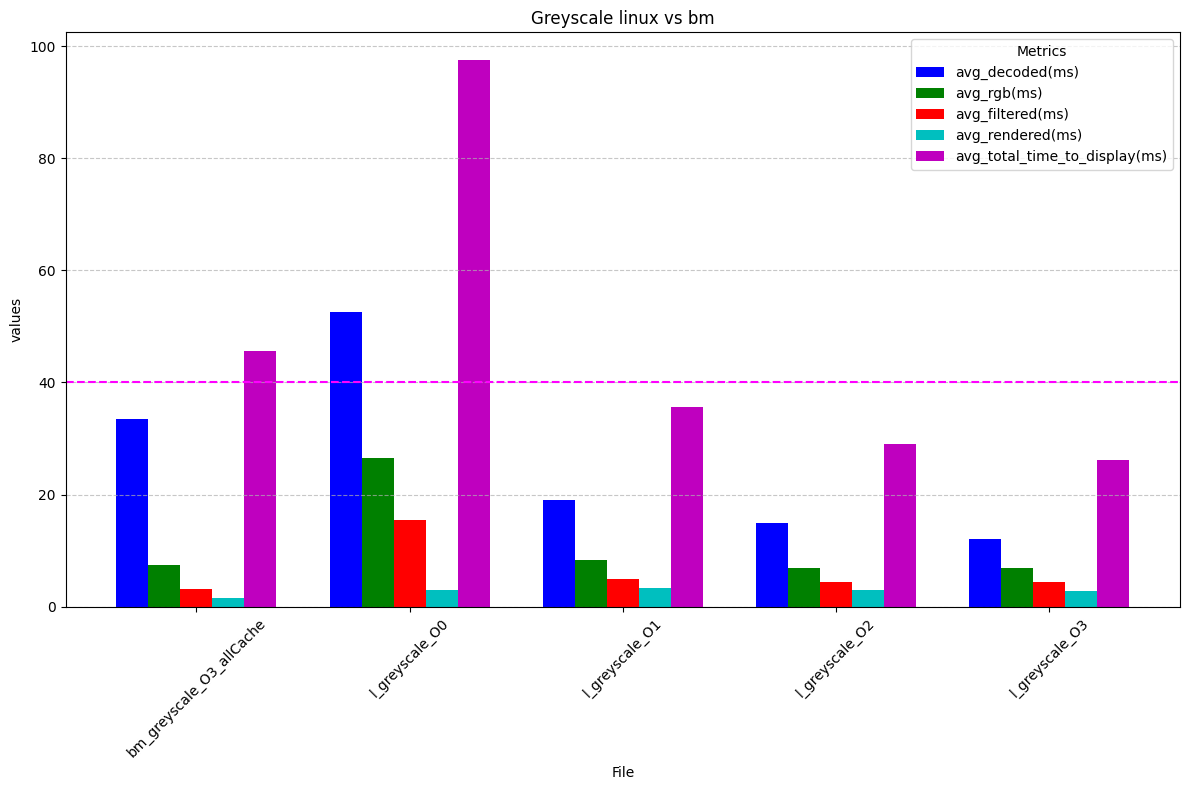

In [24]:
greyscale_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_greyscale_O3_allCache'],
    avg_df[avg_df.index.str.contains('l_greyscale')]
])

x = np.arange(len(greyscale_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(greyscale_graphs.columns):
    plt.bar(x + i * bar_width, greyscale_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(greyscale_graphs.columns) - 1) * bar_width / 2, greyscale_graphs.index, rotation=45)
plt.title('Greyscale linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.tight_layout()

plt.show()

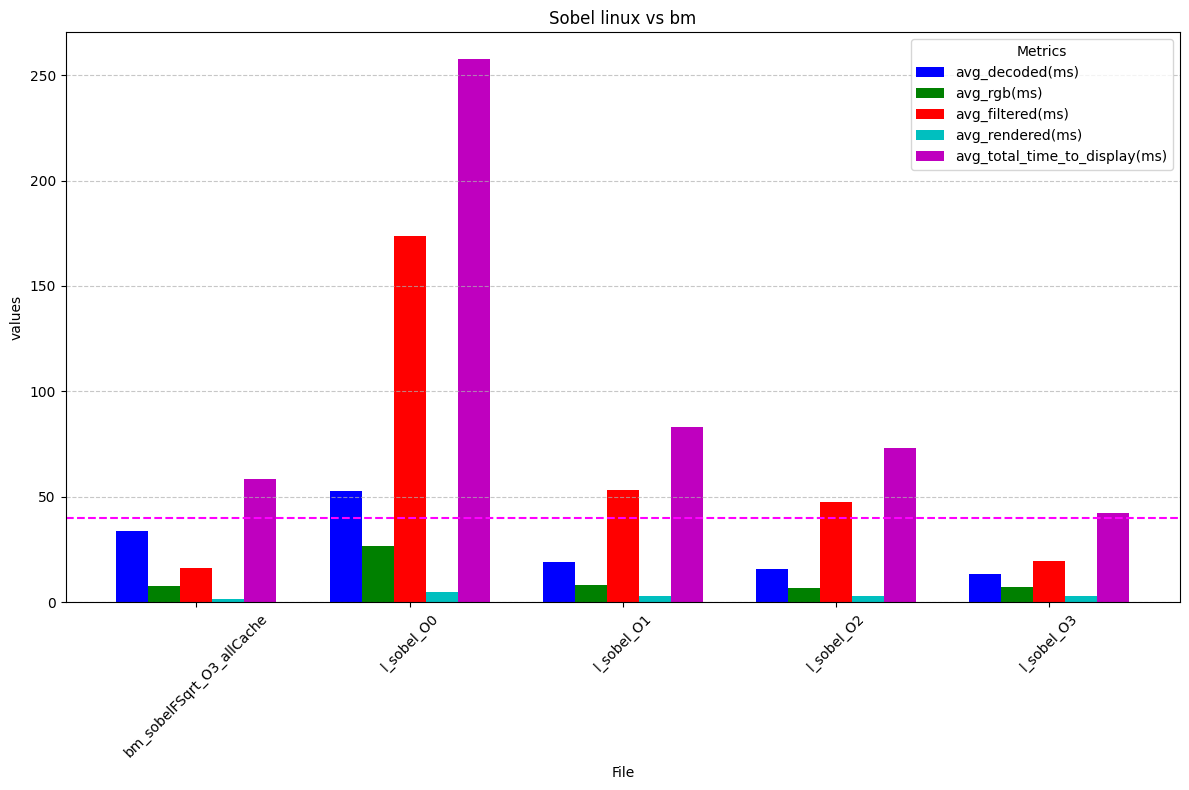

In [25]:
sobel_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_sobelFSqrt_O3_allCache'],
    avg_df[avg_df.index.str.contains('l_sobel')]
])

x = np.arange(len(sobel_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(sobel_graphs.columns):
    plt.bar(x + i * bar_width, sobel_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(sobel_graphs.columns) - 1) * bar_width / 2, sobel_graphs.index, rotation=45)
plt.title('Sobel linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.tight_layout()

plt.show()

In [26]:
print("greyscale allCache bm vs linux")

print(f"decode fractional difference with bm: {((df_l[df_l.index == 'l_greyscale_O3']['avg_decoded(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_decoded(ms)'].iloc[0]) ) / (df_l[df_l.index == 'l_greyscale_O3']['avg_decoded(ms)'].iloc[0])}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"filter fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_filtered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_filtered(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_filtered(ms)'].iloc[0]}")
print(f"render fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_rendered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rendered(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_rendered(ms)'].iloc[0]}")
print(f"overall fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_total_time_to_display(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_total_time_to_display(ms)'].iloc[0]}")

greyscale allCache bm vs linux
decode fractional difference with bm: -1.7734081286924295
rgb conversion fractional difference with bm: -0.07965497849777965
rgb conversion fractional difference with bm: -0.07965497849777965
filter fractional difference with bm: 0.2861888773428639
render fractional difference with bm: 0.4636792763959466
overall fractional difference with bm: -0.7398546722656028


In [27]:
print("sobel allCache bm vs linux")

print(f"decode fractional difference with bm: {((df_l[df_l.index == 'l_sobel_O3']['avg_decoded(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_decoded(ms)'].iloc[0]) ) / (df_l[df_l.index == 'l_sobel_O3']['avg_decoded(ms)'].iloc[0])}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"filter fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_filtered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_filtered(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_filtered(ms)'].iloc[0]}")
print(f"render fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_rendered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_rendered(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_rendered(ms)'].iloc[0]}")
print(f"overall fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_total_time_to_display(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_total_time_to_display(ms)'].iloc[0]}")

sobel allCache bm vs linux
decode fractional difference with bm: -1.5547819756466348
rgb conversion fractional difference with bm: -0.06329790267017045
rgb conversion fractional difference with bm: -0.06329790267017045
filter fractional difference with bm: 0.1743167783715839
render fractional difference with bm: 0.5186461752695232
overall fractional difference with bm: -0.38037101416964836
